In [255]:
import numpy as np
import matplotlib.pyplot as plt

## Problem #1: Linear Regression Test via Looped Misfit

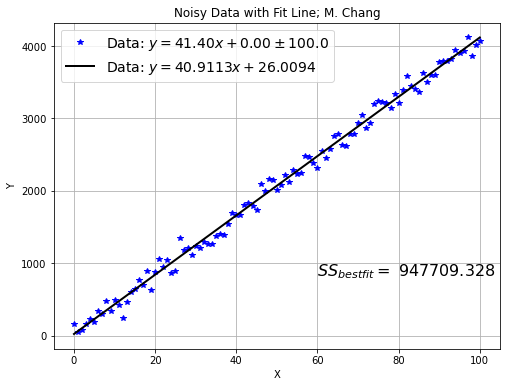

In [274]:
def noisyline(x, b, a):
    # INPUT: x, input points
    #        b, y-intercept
    #        a, noise amplitude
    # OUTPUT: y + noise, the noisy data
    #         m, the slope of the random data
    
    #noise:
    noise = a * np.random.randn(len(x))
    
    #slope:
    m = np.random.uniform(-50, 50)
    
    #line!:
    y = m*x + b
    
    return y + noise, m
    
#specifying parameters and points
x = np.linspace(0, 100, 101)
a = 100
b = 0.0

#using function to get parameters
y_noisy, m = noisyline(x, b, a)

plt.figure(figsize = (8, 6))
#label that contains slope, intercept, and noise
datastr = r"Data: $y = {0:2.2f}x + {1:1.2f} \pm {2:3.1f}$".format(m,b,a)
#plotting raw data
plt.plot(x, y_noisy, 'b*', label  = datastr)

######################
#Linear Best Fit : 
######################
deg = 1
#fitting the data
pfit = np.polyfit(x,y_noisy, deg)
yfit = np.polyval(pfit, x)


######################
#PLOT FIT:
######################
fitstr = r"Data: $y = {0:1.4f}x + {1:1.4f}$".format(pfit[0], pfit[1])

#the line
plt.plot(x, yfit, '-k', lw = 2, label = fitstr)
plt.legend(loc = "upper left", fontsize = 14)
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()

#UDF FOR MISFIT: 
def misfit(y1, y2):
    #y's MUST have same lengths and be defined at some x-locations!!!!
    yresid = y1 - y2
    misfit = np.sum(yresid ** 2)
    return misfit

######################
#MISFIT : 
######################
SSbest = misfit(y_noisy, yfit)

#placing the text depending on whether the slope is positive or negative
if (m > 0):
    plt.text(60, 0.2*np.max(y_noisy), "$SS_{{bestfit}} = $ {0:1.3f}".format(SSbest), fontsize = 16)
else:
    plt.text(60, 0.3*np.min(y_noisy), "$SS_{{bestfit}} = $ {0:1.3f}".format(SSbest), fontsize = 16)

plt.title("Noisy Data with Fit Line; M. Chang")
plt.savefig("Chang_NoisyLine.png", dpi = 150)

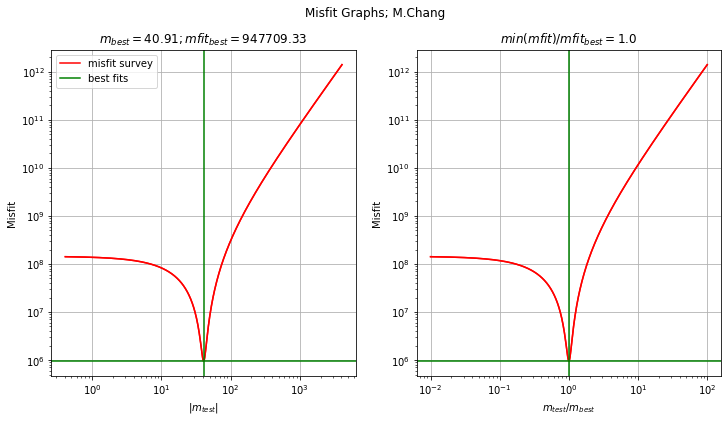

In [276]:
#midpoints
x_half = ((np.max(x) + np.min(x))) / 2
y_half = ((np.max(yfit) + np.min(yfit))) / 2

#slope of best fit line
m_best = pfit[0]

#array of slopes 2 orders of magnitude below and above slope
m_test = m_best*np.logspace(-2, 2, 1001)

fig, ax = plt.subplots(1, 2, figsize = (12,6))  

misfits = []

#looping through each of the slopes to get misfits
for n in m_test:
    y_test = (n * (x - x_half)) + y_half
    square_resid = misfit(y_noisy, y_test)
    if (n == m_best): #the best misfit is when the slope is equal to that of the best fit line
        misfit_best = square_resid
    misfits.append(square_resid)

#labels, titles for each of the subplots
x_plots = [np.abs(m_test), m_test/m_best]
xlines = [np.abs(m_best), np.min(misfits)/misfit_best]
titles = ["$m_{{best}} = {0:1.2f}; mfit_{{best}} = {1:1.2f}$".format(m_best, misfit_best), "$min(mfit)/mfit_{{best}} = {}$".format(np.min(misfits)/misfit_best)]
x_lbls = ['$|m_{test}|$', '$m_{test}/m_{best}$']

#first plot is the misfits vs the magnitudes of the slopes array, second plot is misfits vs the slopes array divided by the best slope
#vertical lines: first plot is when slope is for the best fit line, second plot is the ratio of the minimum misfit to the actual best fit slope (should be one since these values are equal)
#horizontal lines: the best misfit value

for s in [0, 1]: #looping through the plots
    ax[s].semilogy(x_plots[s], misfits, 'r', label = 'misfit survey')
    ax[s].semilogx(x_plots[s], misfits, 'r')
    ax[s].axhline(y = misfit_best, color = 'green', label = 'best fits')
    ax[s].axvline(x = xlines[s], color = 'green')
    ax[s].set_title(titles[s])
    ax[s].set_xlabel(x_lbls[s])
    ax[s].set_ylabel("Misfit")
    ax[s].grid()

ax[0].legend()
plt.suptitle("Misfit Graphs; M.Chang")
plt.savefig("Chang_MisfitValues.png", dpi = 150)

## Problem #2: Earthquake Arrival Time

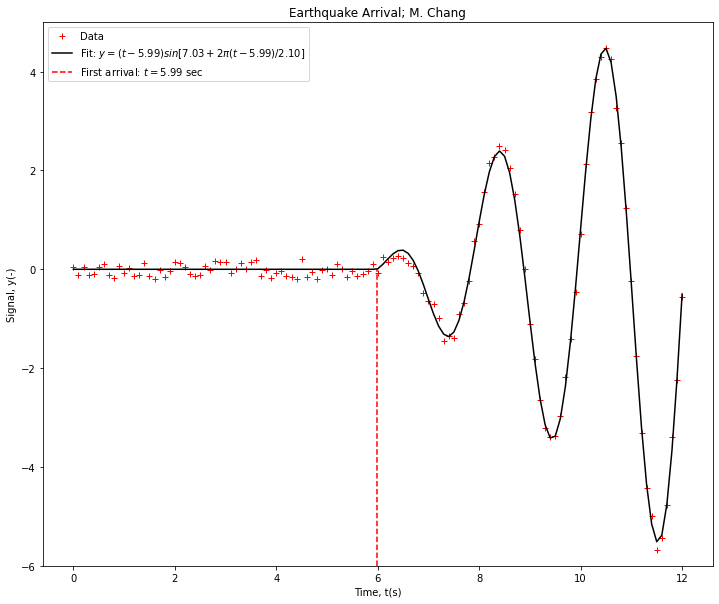

In [269]:
import scipy.io
import scipy.optimize as opt

#loading in the data
a = scipy.io.loadmat("HW3-ZIP/DATA-HW3W21/DATA_EQarrival.mat", squeeze_me = True)
t = a['t']
y = a['y']

def sad_sine(t, t_0, T, phi):
    #INPUT: t, time data
    #       t_0, the time at which the plot starts to oscillate
    #         T, period of oscillation
    #       phi, phase shift
    #OUTPUT: y, the sine curve
    
    t_bool = (t > t_0)
    y = (t - t_0)*np.sin(((2*np.pi*(t - t_0)) / T) + phi)*(t_bool)
    return y

def EQuake_func(t_0, T, phi):
    #INPUT: same for sad_sine
    #OUTPUT: params_out, the coefficients of the curved best fit
    #        covar_out, covariant
    guesses = [t_0, T, phi]
    params_out, covar_out = opt.curve_fit(sad_sine, t, y, p0 = guesses)
    return params_out, covar_out

param, covar = EQuake_func(6.2, 2, 8) #guess  parameters to get the line
plt.figure(figsize = (12, 10))

#raw data
plt.plot(t,y, 'r+', label = "Data")

#the fit line
plt.plot(t, sad_sine(t, param[0], param[1], param[2]), 'k-', label = "Fit: $y = (t - {0:1.2f})sin[{2:1.2f} + 2\pi(t - {0:1.2f})/{1:1.2f}]$".format(param[0], param[1], param[2]))

#vertical line is the time at which the data starts to oscillate
plt.vlines(x = param[0], ymin = -6, ymax = 0, colors = 'r', linestyle = '--', label = "First arrival: $t = {0:1.2f}$ sec".format(param[0]))
plt.ylim(-6, 5)
plt.legend()


plt.title("Earthquake Arrival; M. Chang")
plt.xlabel("Time, t(s)")
plt.ylabel("Signal, y(-)")

plt.savefig("Chang_Earthquake.png", dpi = 150)

## Problem #3: Noisy Sines with Loops and Misfits!

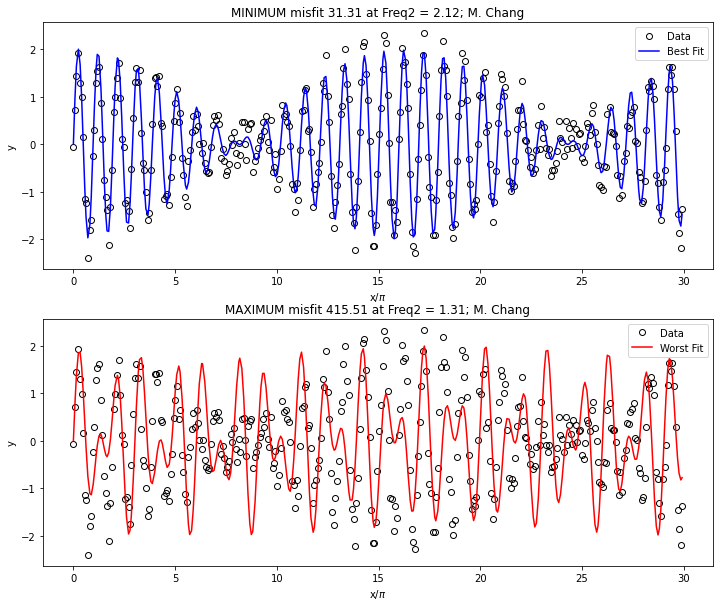

In [271]:
#loading in data
b = scipy.io.loadmat("HW3-ZIP/DATA-HW3W21/BeatingWaves.mat", squeeze_me = True)
x_noisy = b['x_noisy']
y_noisy = b['y_noisy']

#first frequency is 2
f1 = 2.00

def beating(x, f2):
    #INPUT: x, input data
    #       f2, value of second frequency
    #OUTPUT: y, beat curve
    y = np.sin(f1 * x) + np.sin(f2 * x)
    return y

#guessing the f2 values array, ranging from 1 to 3
Guess_f2 = np.arange(1, 3, .01)

#matrix for storing data
M = [[], [], []]


for i in range(len(Guess_f2)): #looping through the guess array
    guesses = Guess_f2[i]
    params_out, covar_out = opt.curve_fit(beating, x_noisy, y_noisy, p0 = guesses, maxfev = 100000) #curve fitting
    f2_fit = params_out[0] #f2 parameter
    y_fit = beating(x_noisy, f2_fit) #creating best fit line
    
    misfit_noise = misfit(y_noisy, y_fit) #calculating misfit at that particular f2
    
    M[0].append(Guess_f2[i]) #adding on guess values, first row
    M[1].append(f2_fit) #adding on f2 parameter values that were outputted, second row
    M[2].append(misfit_noise) #adding on misfit values, third row

best_misfit = np.argmin(M[2]) #best misfit is the lowest
worst_misfit = np.argmax(M[2]) #worst misfit is the highest

#finding the corresponding f2 values
best_f2fit = M[1][best_misfit]
worst_f2fit = M[1][worst_misfit]

#corresponding y curves
best_y_fit = beating(x_noisy, best_f2fit)
worst_y_fit = beating(x_noisy, worst_f2fit)

#for looping through later
y_fits = [best_y_fit, worst_y_fit]
y_labels = ["Best Fit", "Worst Fit"]
clrs_mrk = ['b-', 'r-']
titles = ["MINIMUM misfit {0:1.2f} at Freq2 = {1:1.2f}; M. Chang".format(np.min(M[2]), best_f2fit), "MAXIMUM misfit {0:1.2f} at Freq2 = {1:1.2f}; M. Chang".format(np.max(M[2]), worst_f2fit)]

fig, ax = plt.subplots(2, 1, figsize = (12, 10))

#making x-axis in terms of pi
x_noisy /= np.pi

for x in [0,1]:
    ax[x].plot(x_noisy, y_noisy, 'ko', fillstyle = 'none', label = 'Data') #raw data
    ax[x].plot(x_noisy, y_fits[x], clrs_mrk[x], label = y_labels[x]) #fit line
    ax[x].legend()
    ax[x].set_title(titles[x])
    ax[x].set_xlabel('x/$\pi$')
    ax[x].set_ylabel('y')
    
plt.savefig("Chang_NoisyFitCurve.png", dpi = 150)

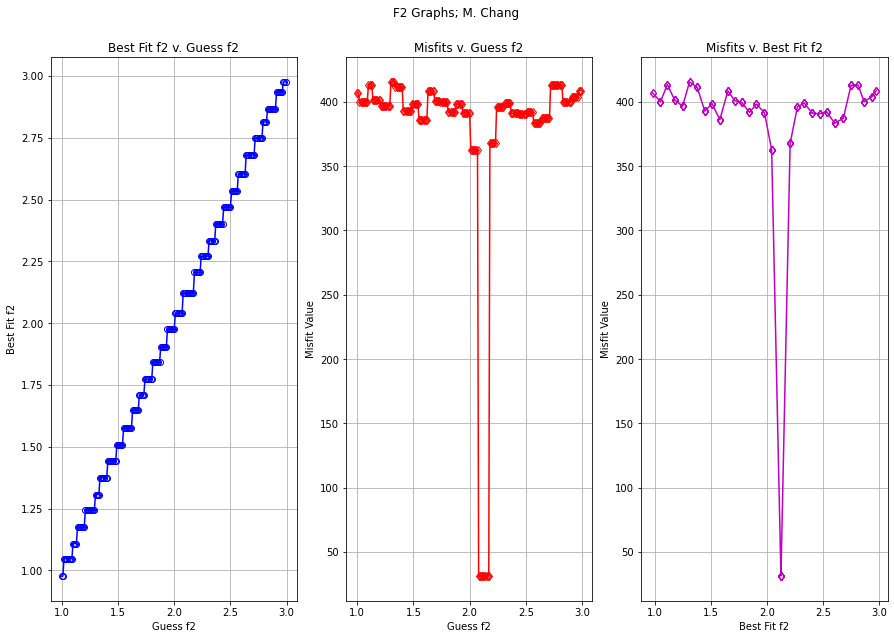

In [279]:
fig, ax = plt.subplots(1, 3, figsize = (15, 10))

#for looping through later
x = [Guess_f2, Guess_f2, M[1]]
y = [M[1], M[2], M[2]]
clrs_mrk = ['bo-', 'rd-', 'md-']
x_lbls = ["Guess f2", "Guess f2", "Best Fit f2"]
y_lbls = ["Best Fit f2", "Misfit Value", "Misfit Value"]
titles = ["Best Fit f2 v. Guess f2", "Misfits v. Guess f2", "Misfits v. Best Fit f2"]

for n in [0, 1, 2]:
    ax[n].plot(x[n], y[n], clrs_mrk[n], fillstyle = 'none') #plotting one of guess f2, best f2, and misfit against another
    ax[n].grid()
    ax[n].set_title(titles[n])
    ax[n].set_xlabel(x_lbls[n])
    ax[n].set_ylabel(y_lbls[n])

plt.suptitle("F2 Graphs; M. Chang", y =  0.95)
plt.savefig("Chang_MisfitF2.png", dpi = 150)